In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.stats import chisquare
Path.cwd()

PosixPath('/home/francesco/FisMedLab/Silici/Secondo Giorno/siliciGiorno2')

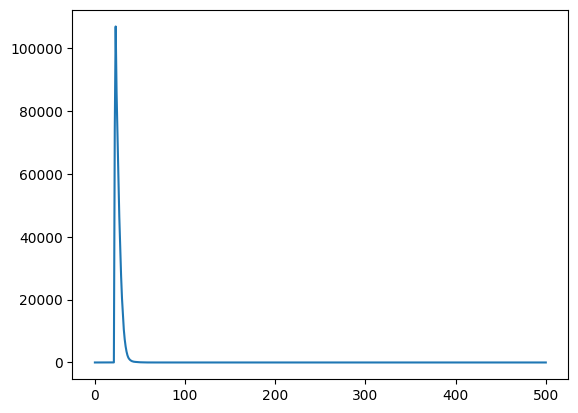

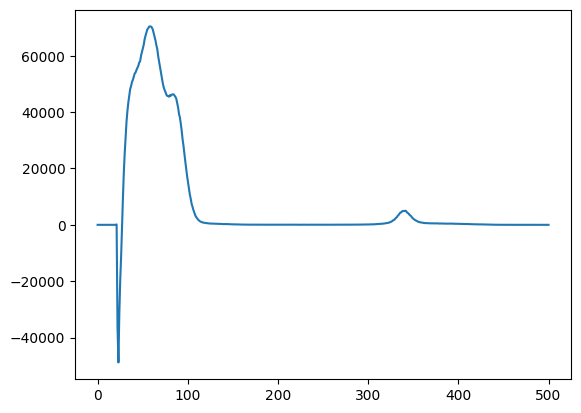

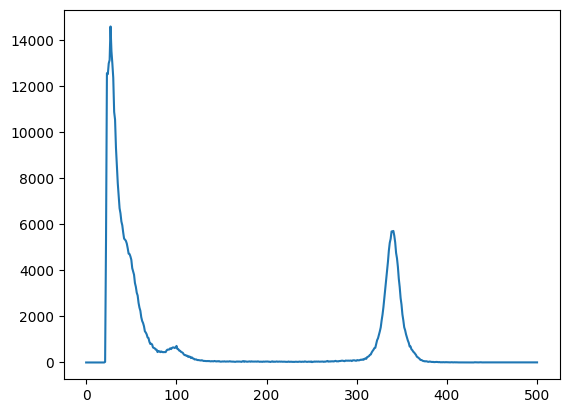

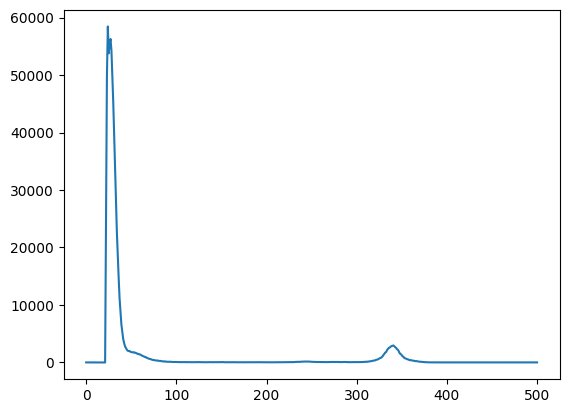

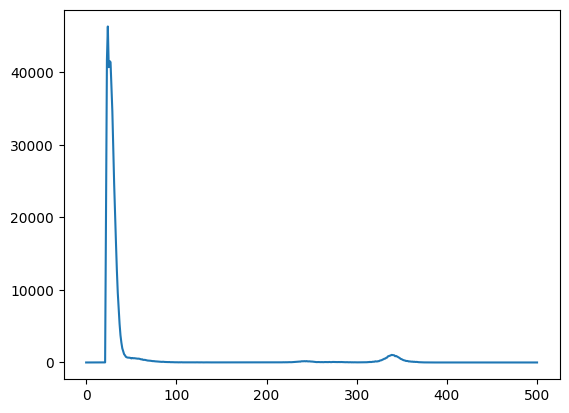

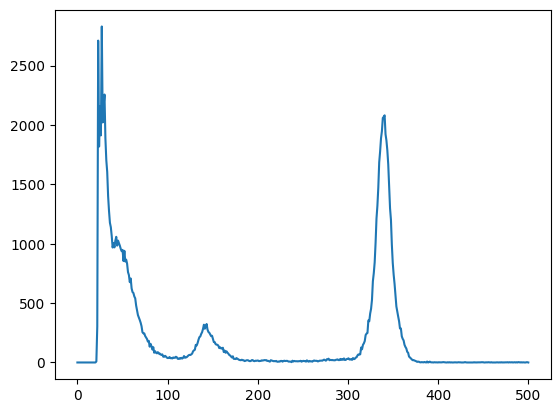

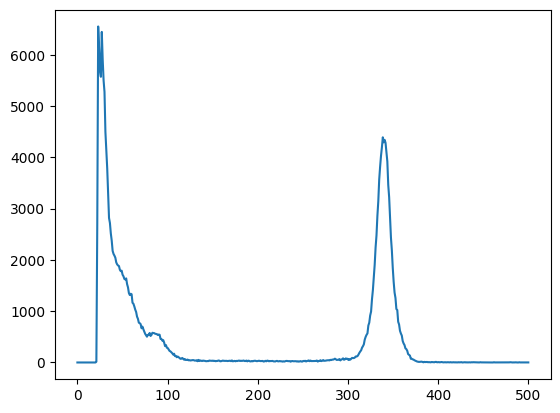

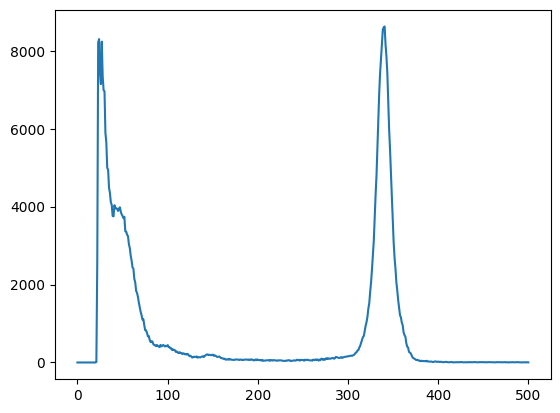

In [3]:
Pb= np.loadtxt('Am241_12V_180s_50micronPb82.Spe')
Mo= np.loadtxt('Am241_12V_180s_100micronMo42.Spe')
Gd1= np.loadtxt('Am241_12V_180s_120micronGd64.Spe')
Gd2= np.loadtxt('Am241_12V_180s_240micronGd64.Spe')
Sn= np.loadtxt('Am241_12V_180s_250micronSn50.Spe')
Zr= np.loadtxt('Am241_12V_180s_250micronZr40.Spe')
Am= np.loadtxt('Am241_12V_180s.Spe')
noise=np.loadtxt('rumore12V.Spe')

x=np.linspace(0,500,500)

plt.plot(x,noise[0:500])
plt.show()
plt.plot(x,Pb[0:500]-noise[0:500])
plt.show()

plt.plot(x,Mo[0:500]-noise[0:500])
plt.show()
plt.plot(x,Gd1[0:500]-noise[0:500])
plt.show()
plt.plot(x,Gd2[0:500]-noise[0:500])
plt.show()
plt.plot(x,Sn[0:500]-noise[0:500])
plt.show()
plt.plot(x,Zr[0:500]-noise[0:500])
plt.show()
plt.plot(x,Am[0:500]-noise[0:500])
plt.show()

Fit picco a 60 keV Americio

Chi-squared: 35.37
Reduced chi-squared: 0.24
Energy resolution: 10.84%


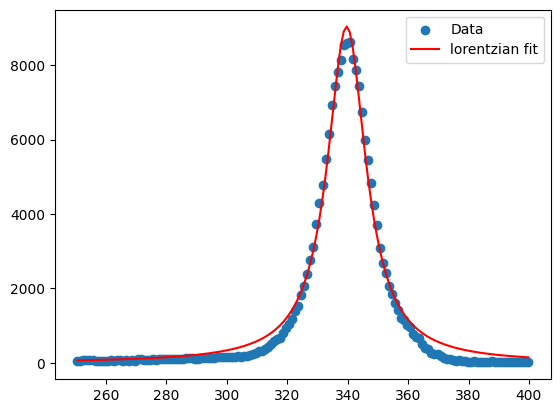

In [18]:
x=np.linspace(0,500,500)

# Define the lorentzian function
def lorentzian(x, amplitude, mean, fwhm):
    return (amplitude * (fwhm / 2) ** 2) / ((x - mean) ** 2 + (fwhm / 2) ** 2)

# Load the data and create the x and y arrays
y = Am[250:400]
x1 = x[250:400]

# Plot the data
plt.scatter(x1, y, label='Data')

# Fit the lorentzian to the data using curve_fit
p0 = [9000, 340, 20]  # Initial guesses for amplitude, mean, and stddev
coeff, var_matrix = curve_fit(lorentzian, x1, y, p0=p0)
fit_y = lorentzian(x1, *coeff)
plt.plot(x1, fit_y, 'r-', label='lorentzian fit')

# Calculate the chi-squared value
residuals = y - fit_y
chi2 = np.sum((residuals / fit_y) ** 2)
dof = len(x1) - len(p0)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

# Calculate the energy resolution (FWHM) of the peak
fwhm = 2 * np.sqrt(2 * np.log(2)) * abs(coeff[2])
resolution = fwhm / coeff[1] * 100  # Convert to percentage
print('Energy resolution: {:.2f}%'.format(resolution))

# Add a legend and show the plot
plt.legend()
plt.show()


Chi-squared: 348.21
Reduced chi-squared: 3.83


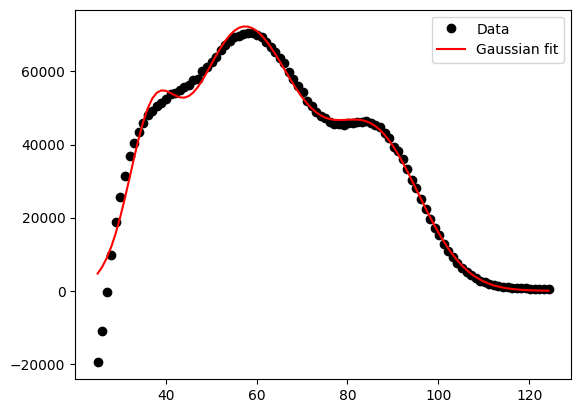

In [5]:

x=np.linspace(0,500,500)

# Define the sum of Gaussian functions
def gaussian_sum(x, *params):
    n = int(len(params) / 3)  # Number of Gaussians
    y = np.zeros_like(x)
    for i in range(n):
        amp = params[i * 3]
        mean = params[i * 3 + 1]
        stddev = params[i * 3 + 2]
        y += amp * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2))
    return y

# Load the data and create the x and y arrays
x = x[25:125]
y = Pb[25:125]-noise[25:125]

# Plot the data
plt.plot(x, y, 'ko', label='Data')

# Guess initial parameters for Gaussian fit
n_gaussians = 3  # Number of Gaussians to fit
p0 = np.zeros(n_gaussians * 3)
p0[0] = 45000  # Amplitude of first Gaussian
p0[1] = 30  # Mean of first Gaussian
p0[2] = 27  # Std. dev. of first Gaussian
p0[3] = 75000  # Amplitude of second Gaussian
p0[4] = 58  # Mean of second Gaussian
p0[5] = 30  # Std. dev. of second Gaussian
p0[6] = 42000  # Amplitude of third Gaussian
p0[7] = 100  # Mean of third Gaussian
p0[8] = 10  # Std. dev. of third Gaussian

# Fit the sum of Gaussians to the data using curve_fit
coeff, var_matrix = curve_fit(gaussian_sum, x, y, p0=p0)
fit_y = gaussian_sum(x, *coeff)
plt.plot(x, fit_y, 'r-', label='Gaussian fit')

# Calculate the chi-squared value
residuals = y - fit_y
chi2 = np.sum((residuals / fit_y) ** 2)
dof = len(x) - len(p0)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

# Add a legend and show the plot
plt.legend()
plt.show()


Chi-squared: 71.81
Reduced chi-squared: 1.33


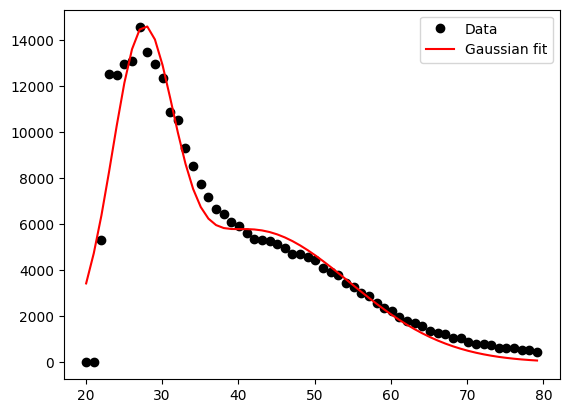

In [48]:
x=np.linspace(0,500,500)

# Define the sum of Gaussian functions
def gaussian_sum(x, *params):
    n = int(len(params) / 3)  # Number of Gaussians
    y = np.zeros_like(x)
    for i in range(n):
        amp = params[i * 3]
        mean = params[i * 3 + 1]
        stddev = params[i * 3 + 2]
        y += amp * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2))
    return y

# Load the data and create the x and y arrays
x = x[20:80]
y = Mo[20:80]-noise[20:80]

# Plot the data
plt.plot(x, y, 'ko', label='Data')

# Guess initial parameters for Gaussian fit
n_gaussians = 2  # Number of Gaussians to fit
p0 = np.zeros(n_gaussians * 3)
p0[0] = 15000  # Amplitude of first Gaussian
p0[1] = 10  # Mean of first Gaussian
p0[2] = 20  # Std. dev. of first Gaussian
p0[3] = 5000  # Amplitude of second Gaussian
p0[4] = 49  # Mean of second Gaussian
p0[5] = 30  # Std. dev. of second Gaussian


# Fit the sum of Gaussians to the data using curve_fit
coeff, var_matrix = curve_fit(gaussian_sum, x, y, p0=p0)
fit_y = gaussian_sum(x, *coeff)
plt.plot(x, fit_y, 'r-', label='Gaussian fit')

# Calculate the chi-squared value
residuals = y - fit_y
chi2 = np.sum((residuals / fit_y) ** 2)
dof = len(x) - len(p0)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

# Add a legend and show the plot
plt.legend()
plt.show()

Chi-squared: 0.18
Reduced chi-squared: 0.00
Energy resolution: 40.82%


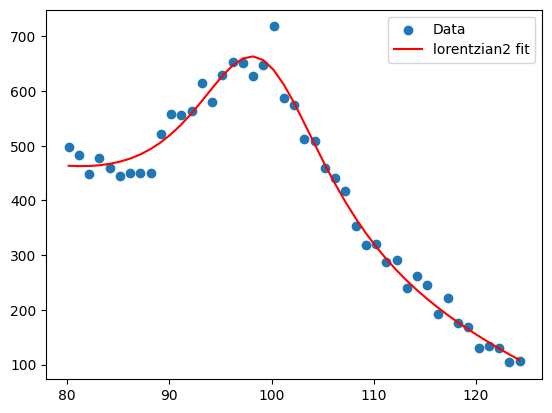

In [59]:
def lorentzian2(x, amplitude, mean, fwhm,m,b):
    return ((amplitude * (fwhm / 2) ** 2) / ((x - mean) ** 2 + (fwhm / 2) ** 2))-m*x+b


# Load the data and create the x and y arrays
x=np.linspace(0,500,500)

y = Mo[80:125]
x1 = x[80:125]

# Plot the data
plt.scatter(x1, y, label='Data')

# Fit the lorentzian to the data using curve_fit
p0 = [650, 95, 20,20,1000]  # Initial guesses for amplitude, mean, and stddev
coeff, var_matrix = curve_fit(lorentzian2, x1, y, p0=p0)
fit_y = lorentzian2(x1, *coeff)
plt.plot(x1, fit_y, 'r-', label='lorentzian2 fit')

# Calculate the chi-squared value
residuals = y - fit_y
chi2 = np.sum((residuals / fit_y) ** 2)
dof = len(x1) - len(p0)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

# Calculate the energy resolution (FWHM) of the peak
fwhm = 2 * np.sqrt(2 * np.log(2)) * abs(coeff[2])
resolution = fwhm / coeff[1] * 100  # Convert to percentage
print('Energy resolution: {:.2f}%'.format(resolution))

# Add a legend and show the plot
plt.legend()
plt.show()


difficile fittare dato che ci sono picchi strani

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 2000.

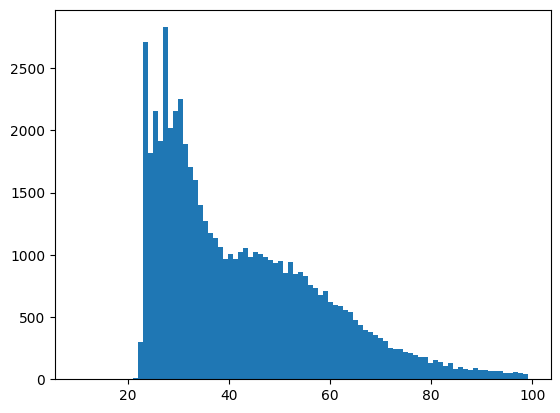

In [8]:
x=np.linspace(0,500,500)


# Load the data and create the x and y arrays
x = x[10:100]
y = Sn[10:100]-noise[10:100]

# Plot the data
plt.plot(x, y, 'ko', label='Data')

# Guess initial parameters for Gaussian fit
n_gaussians = 3  # Number of Gaussians to fit
p0 = np.zeros(n_gaussians * 3)
p0[0] = 45000  # Amplitude of first Gaussian
p0[1] = 30  # Mean of first Gaussian
p0[2] = 27  # Std. dev. of first Gaussian
p0[3] = 75000  # Amplitude of second Gaussian
p0[4] = 58  # Mean of second Gaussian
p0[5] = 30  # Std. dev. of second Gaussian
p0[6] = 42000  # Amplitude of third Gaussian
p0[7] = 100  # Mean of third Gaussian
p0[8] = 10  # Std. dev. of third Gaussian

# Fit the sum of Gaussians to the data using curve_fit
coeff, var_matrix = curve_fit(gaussian_sum, x, y, p0=p0)
fit_y = gaussian_sum(x, *coeff)
plt.plot(x, fit_y, 'r-', label='Gaussian fit')

# Calculate the chi-squared value
residuals = y - fit_y
chi2 = np.sum((residuals / fit_y) ** 2)
dof = len(x) - len(p0)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

# Add a legend and show the plot
plt.legend()
plt.show()


Chi-squared: 8.26
Reduced chi-squared: 0.09
Energy resolution: 38.15%


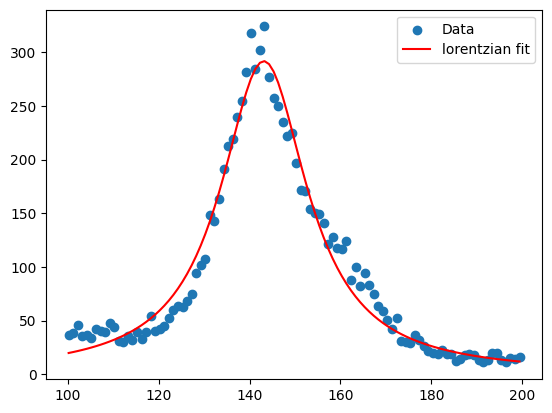

In [12]:
x=np.linspace(0,500,500)


# Load the data and create the x and y arrays
y = Sn[100:200]-noise[100:200]
x1 = x[100:200]

# Plot the data
plt.scatter(x1, y, label='Data')

# Fit the lorentzian to the data using curve_fit
p0 = [300, 142, 20]  # Initial guesses for amplitude, mean, and stddev
coeff, var_matrix = curve_fit(lorentzian, x1, y, p0=p0)
fit_y = lorentzian(x1, *coeff)
plt.plot(x1, fit_y, 'r-', label='lorentzian fit')

# Calculate the chi-squared value
residuals = y - fit_y
chi2 = np.sum((residuals / fit_y) ** 2)
dof = len(x1) - len(p0)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

# Calculate the energy resolution (FWHM) of the peak
fwhm = 2 * np.sqrt(2 * np.log(2)) * abs(coeff[2])
resolution = fwhm / coeff[1] * 100  # Convert to percentage
print('Energy resolution: {:.2f}%'.format(resolution))

# Add a legend and show the plot
plt.legend()
plt.show()

Riprovo con multigaussiano

Chi-squared: 91.47
Reduced chi-squared: 0.97


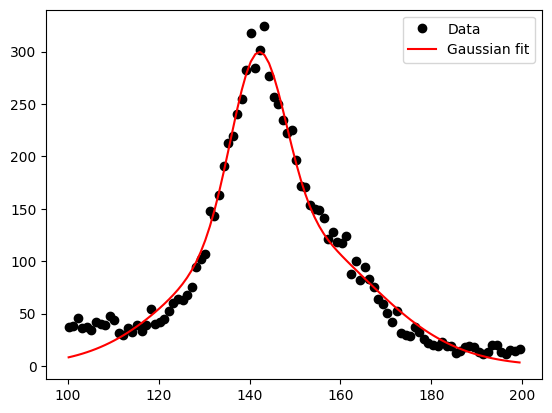

In [16]:
x=np.linspace(0,500,500)

# Load the data and create the x and y arrays
x = x[100:200]
y = Sn[100:200]-noise[100:200]

# Plot the data
plt.plot(x, y, 'ko', label='Data')

# Guess initial parameters for Gaussian fit
n_gaussians = 2  # Number of Gaussians to fit
p0 = np.zeros(n_gaussians * 3)
p0[0] = 300  # Amplitude of first Gaussian
p0[1] = 142  # Mean of first Gaussian
p0[2] = 20  # Std. dev. of first Gaussian
p0[3] = 130  # Amplitude of second Gaussian
p0[4] = 162  # Mean of second Gaussian
p0[5] = 30  # Std. dev. of second Gaussian


# Fit the sum of Gaussians to the data using curve_fit
coeff, var_matrix = curve_fit(gaussian_sum, x, y, p0=p0)
fit_y = gaussian_sum(x, *coeff)
plt.plot(x, fit_y, 'r-', label='Gaussian fit')

# Calculate the chi-squared value
residuals = y - fit_y
chi2 = np.sum((residuals / fit_y) ** 2)
dof = len(x) - len(p0)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

# Add a legend and show the plot
plt.legend()
plt.show()

Chi-squared: 97.67
Reduced chi-squared: 1.63
Energy resolution: 52.00%


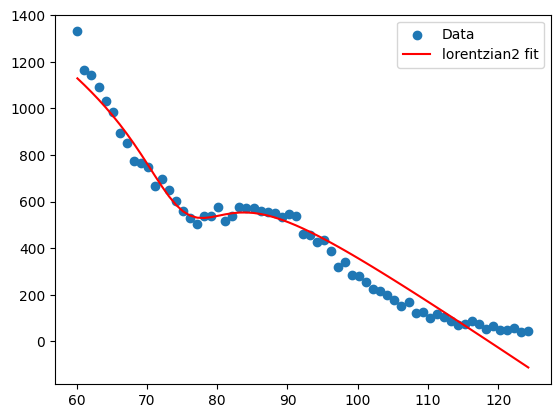

In [30]:
def lorentzian2(x, amplitude, mean, fwhm,m,b):
    return ((amplitude * (fwhm / 2) ** 2) / ((x - mean) ** 2 + (fwhm / 2) ** 2))-m*x+b


# Load the data and create the x and y arrays
x=np.linspace(0,500,500)

y = Zr[60:125]-noise[60:125]
x1 = x[60:125]

# Plot the data
plt.scatter(x1, y, label='Data')

# Fit the lorentzian to the data using curve_fit

p0 = [650, 90, 40,150,1000]  # Initial guesses for amplitude, mean, and stddev
coeff, var_matrix = curve_fit(lorentzian2, x1, y, p0=p0)
fit_y = lorentzian2(x1, *coeff)
plt.plot(x1, fit_y, 'r-', label='lorentzian2 fit')

# Calculate the chi-squared value
residuals = y - fit_y
chi2 = np.sum((residuals / fit_y) ** 2)
dof = len(x1) - len(p0)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

# Calculate the energy resolution (FWHM) of the peak
fwhm = 2 * np.sqrt(2 * np.log(2)) * abs(coeff[2])
resolution = fwhm / coeff[1] * 100  # Convert to percentage
print('Energy resolution: {:.2f}%'.format(resolution))

# Add a legend and show the plot
plt.legend()
plt.show()
